Méthode LOF

Confusion Matrix:
[[221   1]
 [120   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       222
           1       0.00      0.00      0.00       120

    accuracy                           0.65       342
   macro avg       0.32      0.50      0.39       342
weighted avg       0.42      0.65      0.51       342

Accuracy : 0.6461988304093568
Model: ROC AUC=0.488


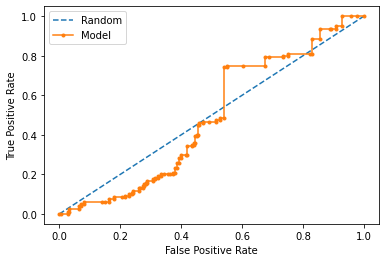

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, algorithm='auto', contamination=0.0001, metric='euclidean')
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
#clf.fit(X_train,y_train)
y_pred = clf.fit_predict(X_test)
X_scores = -clf.negative_outlier_factor_

y=np.reshape(y,(683,))
#y_pred=np.reshape(y_pred,(683,1))
y_pred[y_pred>0]=0
y_pred[y_pred<0]=1

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy :",result2)


random_probs = [0 for _ in range(len(y_test))]
# calculate AUC
model_auc = roc_auc_score(y_test, X_scores)
# summarize score
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate ROC Curve
    # For the Random Model
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
    # For the actual model
model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
# Plot the roc curve for the model and the random model line
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.plot(model_fpr, model_tpr, marker='.', label='Model')
# Create labels for the axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Méthode Kmeans

In [138]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import scipy.io as sp

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_test)
y_pred=kmeans.labels_

print(KMeans(n_clusters=2, random_state=0).fit(X_test))
#X_scores ??

y_test=np.reshape(y_test,(len(y_test,)))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

result1 = classification_report(y_test, y_pred)
result2 = accuracy_score(y_test,y_pred)
if result2 < 0.1 :
    y_pred[y_pred>0.5]=-1
    y_pred[y_pred>-0.5]=1
    y_pred[y_pred<0]=0
    result1 = classification_report(y_test, y_pred)
    result2 = accuracy_score(y_test,y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report:",)
print (result1)
print("Accuracy :",result2)


"""
random_probs = [0 for _ in range(len(y_test))]
# calculate AUC
model_auc = roc_auc_score(y_test, X_scores)
# summarize score
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate ROC Curve
    # For the Random Model
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
    # For the actual model
model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
# Plot the roc curve for the model and the random model line
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.plot(model_fpr, model_tpr, marker='.', label='Model')
# Create labels for the axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
"""

KMeans(n_clusters=2, random_state=0)
Confusion Matrix:
[[  7 215]
 [114   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       222
           1       0.94      0.95      0.95       120

    accuracy                           0.96       342
   macro avg       0.96      0.96      0.96       342
weighted avg       0.96      0.96      0.96       342

Accuracy : 0.9619883040935673


"\nrandom_probs = [0 for _ in range(len(y_test))]\n# calculate AUC\nmodel_auc = roc_auc_score(y_test, X_scores)\n# summarize score\nprint('Model: ROC AUC=%.3f' % (model_auc))\n# calculate ROC Curve\n    # For the Random Model\nrandom_fpr, random_tpr, _ = roc_curve(y_test, random_probs)\n    # For the actual model\nmodel_fpr, model_tpr, _ = roc_curve(y_test, X_scores)\n# Plot the roc curve for the model and the random model line\nplt.plot(random_fpr, random_tpr, linestyle='--', label='Random')\nplt.plot(model_fpr, model_tpr, marker='.', label='Model')\n# Create labels for the axis\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\n# show the legend\nplt.legend()\n# show the plot\nplt.show()\n"

Méthode KernelDensity

[0.37968368 0.37968368 0.37968368 0.37969486 0.37968368 2.17145992
 1.07283086 0.3796874  1.76599108 2.17145992 0.37971349 0.37971349
 0.37968368 0.37970604 1.07286067 2.86460057 2.17145992 2.32560021
 0.37968368 2.17145619 0.3796874  0.37968368 1.989135   0.37969858
 0.37968368 0.37968368 2.86460057 0.37968368 0.37974703 2.86459685
 0.37968368 0.37968368 1.07283645 0.37968368 0.37969858 0.37968368
 0.37968368 0.37969113 2.86459685 0.37968368 0.3797284  1.98914097
 2.86460057 0.37968368 0.37968368 0.37968368 0.37968368 2.17145992
 0.37968368 2.32560021 0.37968368 0.37968368 0.37973212 2.32560021
 0.37968368 0.3796874  1.07284204 1.0728439  0.37968368 0.37968368
 0.37968368 2.86459685 0.37968368 1.07284576 0.37970976 2.17145619
 0.37968368 0.37968368 0.3796874  1.07283272 0.37968368 0.37968368
 0.37968368 2.32560021 0.37968368 0.37968368 1.47831832 0.37968368
 0.37968368 2.17145184 0.37968368 1.47833323 0.37968368 0.37968368
 0.37968368 0.37968368 0.37968368 0.37968368 2.77758572 0.3796

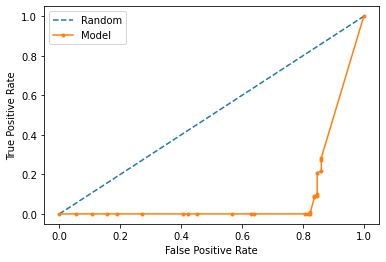

In [141]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import scipy.io as sp

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
y_test=np.reshape(y_test,(len(y_test),))

kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_test)
X_scores=kde.score_samples(X_test)

y_pred=X_scores

"""
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy :",result2)
"""

random_probs = [0 for _ in range(len(y_test))]
# calculate AUC
model_auc = roc_auc_score(y_test, X_scores)
# summarize score
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate ROC Curve
    # For the Random Model
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
    # For the actual model
model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
# Plot the roc curve for the model and the random model line
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.plot(model_fpr, model_tpr, marker='.', label='Model')
# Create labels for the axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
